In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [86]:
df = pd.read_csv('heart_failure.csv')

In [87]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [88]:
alive = df[df['DEATH_EVENT'] == 0 ].sample(n=90)
dead = df[df['DEATH_EVENT'] == 1 ].sample(n=90)

In [89]:
a = np.std(alive['serum_creatinine'])
b = np.std(dead['serum_creatinine'])


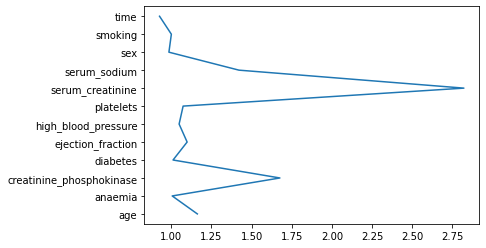

In [90]:
std_r = []
dead.drop('DEATH_EVENT' , axis=1)
alive.drop('DEATH_EVENT' , axis=1)
for i in df[:]:
    std_r.append(np.std(dead[i])/np.std(alive[i]))

plt.plot(std_r , df.columns)
std_r = std_r[:-1]

In [91]:
print(f"Most efective feature is : {df.columns[np.argmax(std_r)]}")

Most efective feature is : serum_creatinine


In [92]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
X = df.drop('DEATH_EVENT' , axis=1)
y = df['DEATH_EVENT']
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
estimator = SVC(max_iter=10000000)
grid = GridSearchCV(estimator=estimator , cv=3 , param_grid=param_grid ,n_jobs=-1 ,verbose=1  ).fit(X,y )

print("Best parameters:", grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'C': 0.1, 'kernel': 'rbf'}


In [93]:
from sklearn.model_selection import KFold , cross_val_score
y = np.array(y)
X_eff = df['serum_creatinine']
X_eff = np.array(X_eff)
X_eff = X_eff.reshape(-1,1)
y = y.reshape(-1 , 1)
sv = SVC(C=0.1, gamma=0.001 , kernel='rbf')
cv = KFold(n_splits=5 ,shuffle=True)
scores= cross_val_score(sv , X_eff , y , cv=cv)
print(f"Mean Score = {np.mean(scores)}")

Mean Score = 0.6788700564971751


In [94]:
for feature in df.columns.drop('DEATH_EVENT') :
    X_Temp = df[feature]
    X_Temp = np.array(X_Temp)
    X_Temp = X_Temp.reshape(-1,1)
    sv_1 = SVC(C=0.1, gamma=0.001 , kernel='rbf')
    cv_1 = KFold(n_splits=5 ,shuffle=True)
    scores_1 = cross_val_score(sv_1 , X_Temp ,   y , cv=cv_1)
    # print("\n" , scores_1 , "\n")
    print(f"Mean Score on {feature:<30} =  {np.mean(scores_1):.3f}")

Mean Score on age                            =  0.679
Mean Score on anaemia                        =  0.679
Mean Score on creatinine_phosphokinase       =  0.679
Mean Score on diabetes                       =  0.679
Mean Score on ejection_fraction              =  0.679
Mean Score on high_blood_pressure            =  0.679
Mean Score on platelets                      =  0.679
Mean Score on serum_creatinine               =  0.679
Mean Score on serum_sodium                   =  0.679
Mean Score on sex                            =  0.679
Mean Score on smoking                        =  0.679
Mean Score on time                           =  0.819


In [112]:
X_time = X['time']
X_new = X.drop('time' , axis=1)

for feature in X_new : 
    X_Temp_2 = X_time + X_new[feature]
    X_Temp_2 = np.array(X_Temp_2).reshape(-1 ,1 )
    sv_2 = SVC(C=0.1, gamma=0.001 , kernel='rbf')
    cv_2 = KFold(n_splits=5 ,shuffle=True)
    scores_1 = cross_val_score(sv_1 , X_Temp_2 ,   y , cv=cv_1)
    # print("\n" , scores_1 , "\n")
    print(f"Mean Score on time and {feature:<30} =  {np.mean(scores_1):.3f}")

Mean Score on time and age                            =  0.816
Mean Score on time and anaemia                        =  0.823
Mean Score on time and creatinine_phosphokinase       =  0.682
Mean Score on time and diabetes                       =  0.823
Mean Score on time and ejection_fraction              =  0.849
Mean Score on time and high_blood_pressure            =  0.823
Mean Score on time and platelets                      =  0.679
Mean Score on time and serum_creatinine               =  0.819
Mean Score on time and serum_sodium                   =  0.830
Mean Score on time and sex                            =  0.816
Mean Score on time and smoking                        =  0.826
